In [1]:
# Required libraries    
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import os

In [2]:
rawMatData = loadmat('Normal_1_0.5.mat')
bwImage = rawMatData["bwImage"]
ctImage = rawMatData["ctImage"]

We study rocks at different scales, from the nanometer to the 100s of killometers scales. At the smaller scales, there empty spaces between the grains that we call pores. In these pores, lies the fluids, i.e., water, oil, or gas. And so, it is important to understand how much of empty space in the rock, i.e., pores, we have and how it is connected. Similarly, the strength of the rock would depend on how the solid part of it, i.e., grains, are connected and glued together, i.e., cemented.

We can study these properties in a number of methods:
1) Get a piece of rock and do experiments on it.
2) Image a piece of rock and run computer simulations on the processed image. With this, we can do a lot of studies and it is more systamatic.

In this challenge, we are taking the second option. We can image the rock using a number of methods. One of these methods is using CT-Scan or micro-CT-scans. Yes, this could be the same CT-Scan technology that you use in the medical industry. Now we have a number of challenges related to this: CT-Scans, specifically, micro-CT-scan, can be very slow. So the procedure is done on smaller samples sparangly. In this challenge, we want you to try to provide a solution for this issue.

![title](Images/overview_rock.jpg)
![title](Images/BinaryImage.png)


The data provided:

- 3D CT Scans.
- 3D Binary images of the CT scan with pores and grains labled (0 and 1).
- Simulators

In testing:
Input: 2D Slices of CT scan are provided.
Output: 3D binary Image

Metrics measured from the 3D binary image:
- Total porosity
- Grain surface area
- Physical properties from simulator: shear and bulk modulus

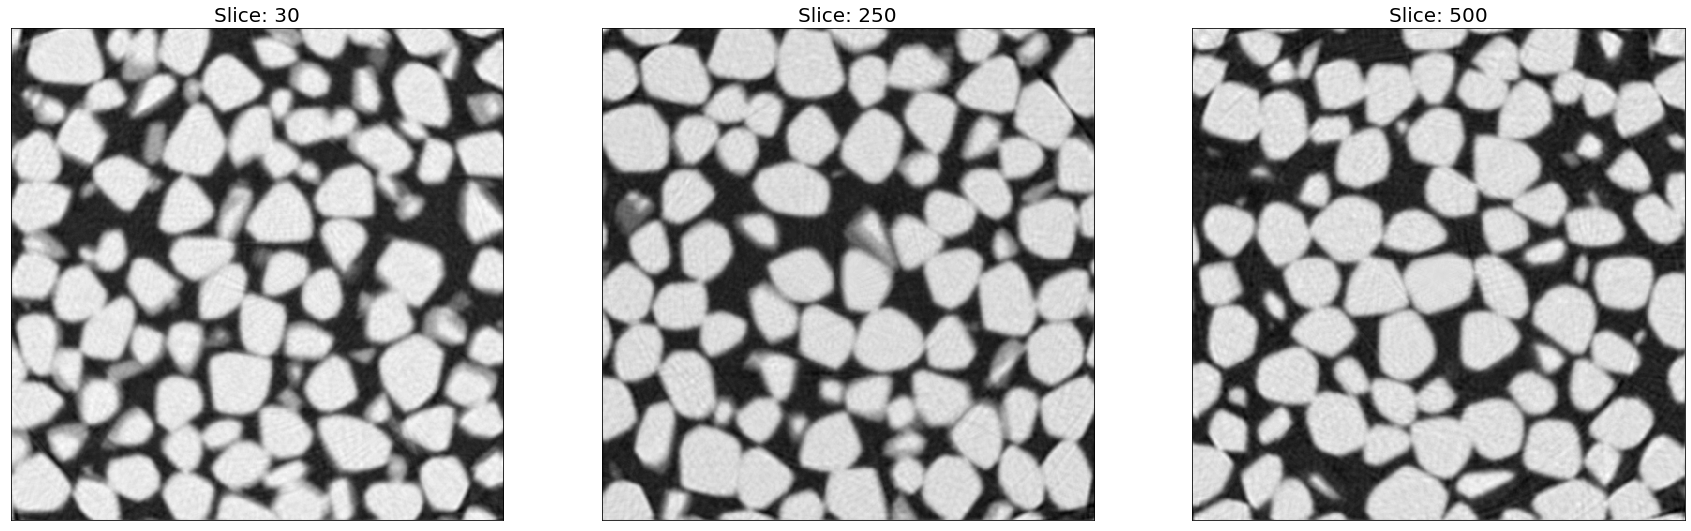

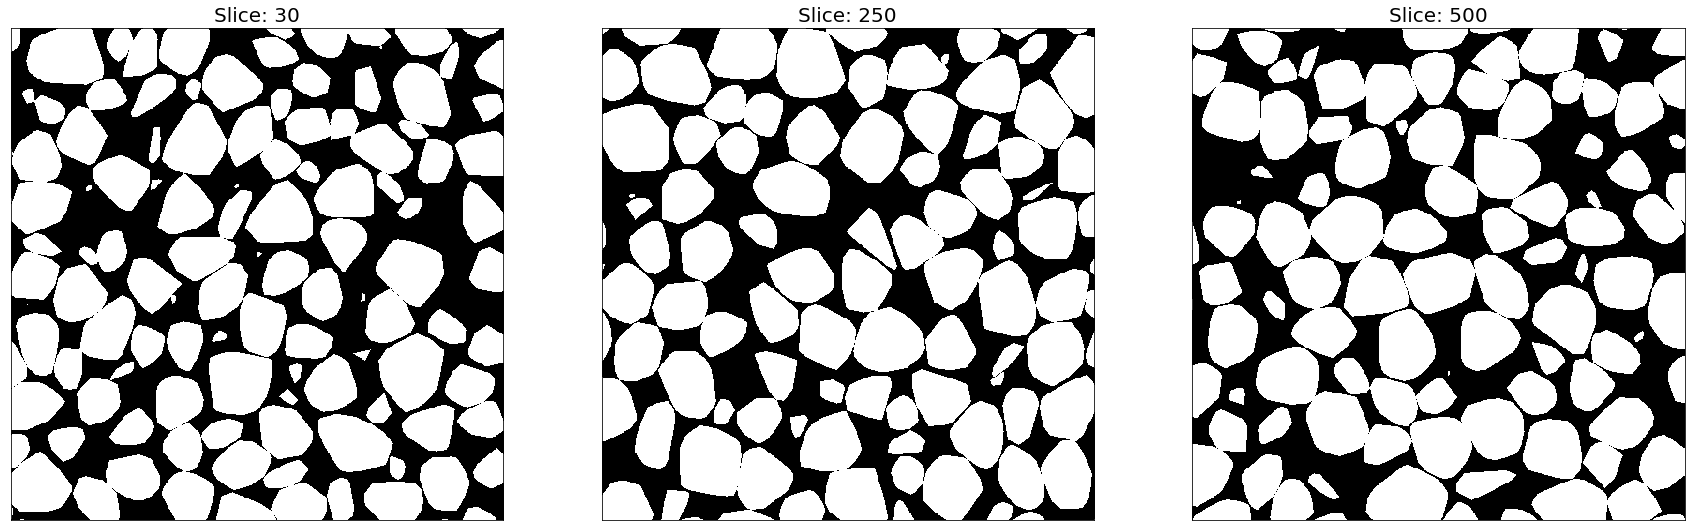

In [3]:
def PlotSlice(image, sliceNumber):
    plt.imshow(image[:,:,sliceNumber], cmap="gray")
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.title("Slice: " + str(sliceNumber), size=20)

def PlotImage(image):
    plt.figure(figsize=(30,10))
    plt.subplot(1,3,1)
    PlotSlice(image, 30)
    plt.subplot(1,3,2)
    PlotSlice(image, 250)
    plt.subplot(1,3,3)
    PlotSlice(image, 500)

PlotImage(ctImage)
PlotImage(bwImage)

In [4]:
# Measure porosity
porosity = np.sum(bwImage==0)/np.prod(bwImage.shape)
print("Prosity: " + str(porosity))

Prosity: 0.34684764219141007


In [11]:
# Measure porosity for thresholded CT-image
porosity = np.sum((ctImage > 128)==0)/np.prod(bwImage.shape)
print("Prosity: " + str(porosity))

Prosity: 0.34341381694375384


A more complex reconstruction would involve matching the physical properties of the rock, such as the strength of the rock. The strength of th rock is a very important parameters in characterizaing rocks for hydrocarbon exploration (and other geoscience and engineering problems, such as making sure that buildings are constructed on solid foundation). This would be a great contribution.

Now the big issue with this is that a lot of the rock strength is a result of the contacts between the grains (see images above for examples). So it is important that the reconstruction takes that into account. We are providing a simulator to run your resultant binary image and obtain the bulk and shear modulus. This will be needed at later stages of the challenge.

In [5]:
# Run simulation
! "./Elas3D/Elas3DCsharp.exe"


#######                       #####  ######
#       #        ##    ####  #     # #     #
#       #       #  #  #            # #     #
#####   #      #    #  ####   #####  #     #
#       #      ######      #       # #     #
#       #      #    # #    # #     # #     #
####### ###### #    #  ####   #####  ######


INITIALIZING WITH ELas3D.PAM
Filename		rock1.dat
Size			120 120 120 
Convergance		0,0001
Headers			0
Write stress		False
Number of phases	2
Density			1 265 
Bulk modulus		2 366 
Shear modulus		0 440 
Applied strain		1 1 1 2 4 6 

SOLVER
Step: 0 	 Convergence: 7,729957E+11 	 Goal: 172,8 	 Energy: 1,1564743E+10
Step: 1 	 Convergence: 9,5827565E+11 	 Goal: 172,8 	 Energy: NotNeeded 	 TimeTaken: 4,784
Step: 2 	 Convergence: 1,1815246E+12 	 Goal: 172,8 	 Energy: NotNeeded 	 TimeTaken: 4,555
Step: 3 	 Convergence: 1,01357466E+12 	 Goal: 172,8 	 Energy: NotNeeded 	 TimeTaken: 4,698
Step: 4 	 Convergence: 1,127213E+12 	 Goal: 172,8 	 Energy: NotNeeded 	 TimeTaken: 4,696
Step: 5 	 Con